In [1]:
import numpy as np
import tqdm 
import sys
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib import colors 
from matplotlib.cm import ScalarMappable
from scipy.integrate import simps, dblquad
import matplotlib as mpl
from scipy import interpolate
import warnings

sys.path.append('../my_funcs/')
from pipeline_main import pipeline
from pipeline_streamers import infall_sphere 


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:22<00:00, 187.49it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:26<00:00, 159.05it/s]


Converged mean angular momentum vector after 0 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:00<00:00, 24347.83it/s]


Disk size: 79.3 au


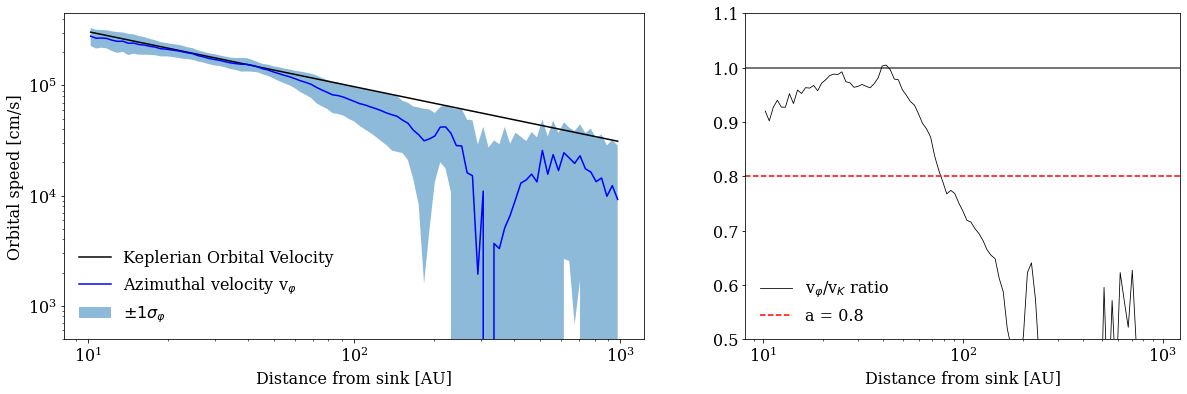

In [2]:
datai = pipeline(snap = 223, run = 'goodold13', sink_id=13)
data = pipeline(snap = 282, run = 'goodold13', sink_id=13)
data.recalc_L(verbose = 1); 
data.calc_disksize()

Converged mean angular momentum vector after 0 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:00<00:00, 25235.25it/s]


Disk size: 79.3 au
Loop through patch present in defined shell


100%|██████████| 4165/4165 [00:07<00:00, 557.35it/s]


3.826479400186429e-06
Converged mean angular momentum vector after 0 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:00<00:00, 25081.88it/s]


Disk size: 79.3 au
Loop through patch present in defined shell


100%|██████████| 4165/4165 [00:04<00:00, 843.43it/s] 


3.869422399419658e-06


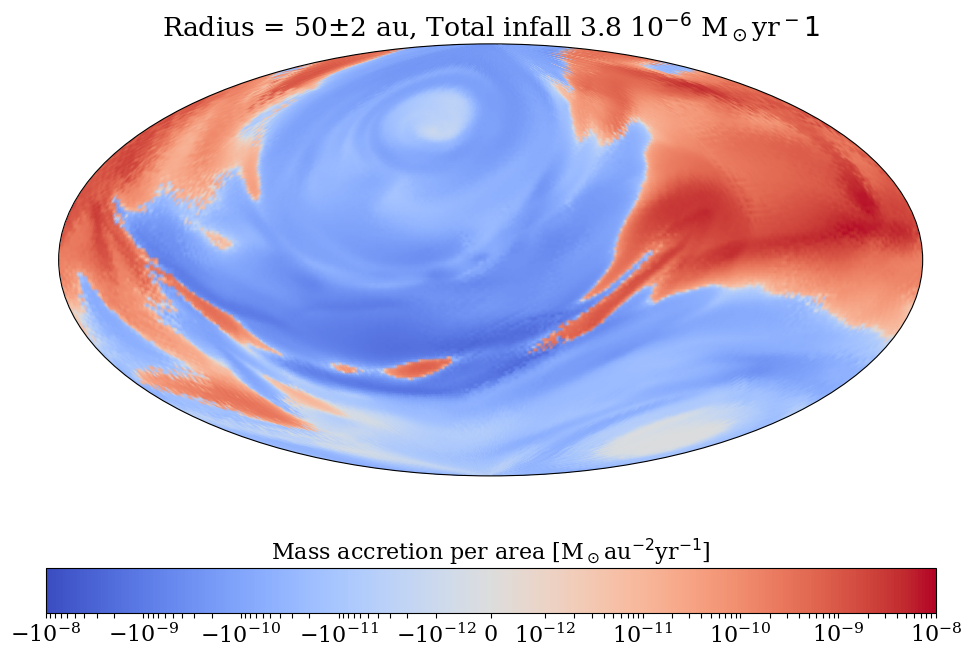

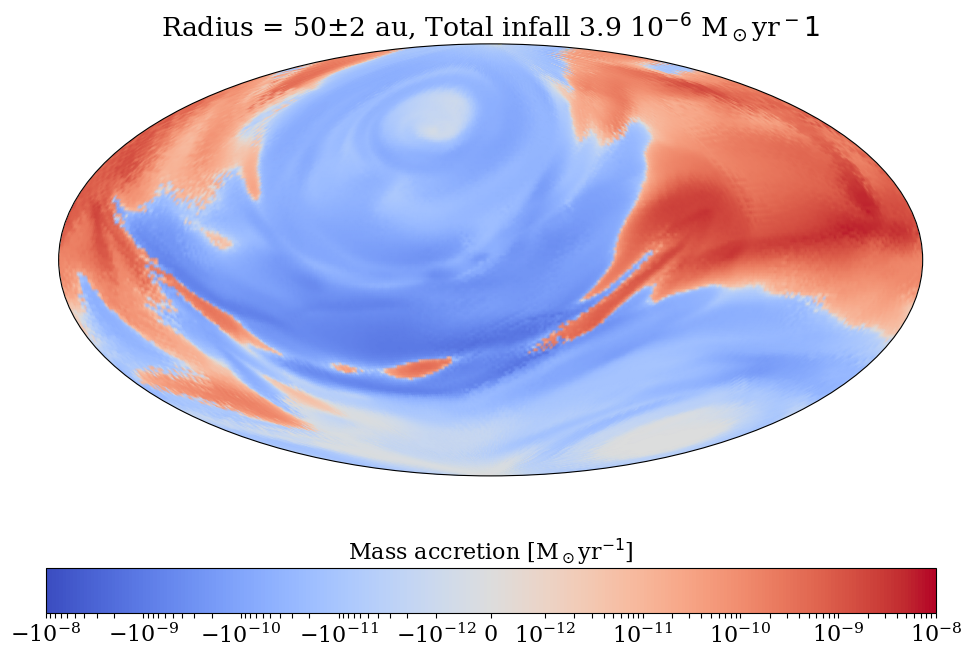

In [15]:
data.recalc_L(verbose = 1); data.calc_disksize(plot=False, verbose = 1)
lon, lat, proj_data, total_infall = data.infall_sphere(shell_r=50, range_plot=1e-8, linear_threshold=1e-12, get_data=True, plot = True, verbose = 1)
print(total_infall)
data.recalc_L(verbose = 1); data.calc_disksize(plot=False, verbose = 1)
lon, lat, proj_data_norm, total_infall_norm = data.infall_sphere(shell_r=50, range_plot=1e-8, linear_threshold=1e-12, get_data=True, plot = True, verbose = 1, normalized = True)
print(total_infall_norm)

array([[0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       ...,
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873]])

In [13]:
cell_areas

array([[0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       ...,
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873]])

In [16]:
lon_N = 360; lat_N = 180

In [17]:
lon = np.linspace(-np.pi, np.pi, lon_N) + np.pi
lat = np.linspace(-np.pi/2., np.pi/2., lat_N) + 0.5 * np.pi

In [18]:
int_func = lambda R, φ:  R*2 * np.sin(φ) 

In [19]:
@np.vectorize
def calc_area_sphere(R, φi, φf, θi, θf):
    res = dblquad(lambda θ, φ:  R**2 * np.sin(φ), θi, θf, φi, φf)[0]
    return res
calc_area_sphere(1, 0, 2*np.pi, 0, np.pi), calc_area_sphere(50, 0, 2*np.pi, 0, np.pi), 4 * np.pi * 50**2

(array(12.56637061), array(31415.9265359), 31415.926535897932)

In [20]:
np.sum(calc_area_sphere(1, lon[0], lon[1], lat[:-1], lat[1:])) * (lon_N - 1)

12.566370614359027

In [21]:
lat_areas = calc_area_sphere(50, lon[0], lon[1], lat[:-1], lat[1:])

In [22]:
cell_areas = np.array([lat_areas for _ in range(lon_N - 1)]) 

In [23]:
cell_areas.mean()

0.48888013781138734

In [24]:
np.sum(cell_areas * proj_data)

3.869422399419658e-06

In [28]:
proj_data_norm / proj_data 

array([[0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       ...,
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873]])

In [26]:
cell_areas

array([[0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       ...,
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873],
       [0.00673873, 0.02021411, 0.03368327, ..., 0.03368327, 0.02021411,
        0.00673873]])

In [31]:
(np.isclose(proj_data_norm / proj_data, cell_areas)).all()

True